In [143]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import image
from PIL import Image
import io
import os
import urllib.request

In [144]:
# Directory to save badges
badge_dir = 'badges'
if not os.path.exists(badge_dir):
    os.makedirs(badge_dir)

In [145]:
# Load data
df = pd.read_html('https://fbref.com/en/comps/9/2019-2020/2019-2020-Premier-League-Stats', attrs={'id':"results2019-202091_overall"})[0]

In [146]:
# Generate badge URLs
df['badge_url'] = df['Squad'].apply(
    lambda x: f"https://raw.githubusercontent.com/ryanojd/Premier-League-Logos/main/{x.lower().replace(' ', '_')}.png"
)

In [147]:
# Function to load image from URL, save it locally, and return the local file path
def load_image(url, squad_name):
    try:
        with urllib.request.urlopen(url) as response:
            img_data = response.read()  # Read the image data from the URL
            img = Image.open(io.BytesIO(img_data))  # Open the image with PIL
            file_path = os.path.join(badge_dir, f"{squad_name.lower().replace(' ', '_')}.png")
            img.save(file_path)  # Save the image locally
            return file_path  # Return the file path
    except Exception as e:
        print(f"Error loading image from {url}: {e}")
        return None  # Return None if the image can't be loaded

In [148]:
# Apply the function to load images
df['badge'] = df.apply(lambda row: load_image(row['badge_url'], row['Squad']), axis=1)

In [153]:
# Rest of the dataframe processing
df = df[['Rk', 'badge', 'Squad', 'MP', 'W', 'D',
         'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP',
         'xG', 'xGA', 'xGD', 'xGD/90', 'Top Team Scorer']]

bg_color = "#FFFFFF"
text_color = "#000000"

row_colors = {
    "champ": "#F3DF00",
    "top4": "#BEFFA2",
    "top6": "#FFFC97",
    "relegation": "#FF9999",
    "even": "#E2E2E1",
    "odd": "#C0C0C0",
}

plt.rcParams["text.color"] = text_color
plt.rcParams["font.family"] = "monospace"

In [160]:
# Define column definitions
col_defs = [
    ColumnDefinition(name="RK", textprops={"ha":"center"}, width=0.5),
    ColumnDefinition(name="badge", textprops={"ha":"center", "va":"center", "color": bg_color}, width=0.5, plot_fn=image),
    ColumnDefinition(name="Squad", textprops={"ha":"left", "weight":"bold"}, width=1.75),
    ColumnDefinition(name="MP", group="Matches Played", textprops={"ha":"center"}, width=0.5),
    ColumnDefinition(name="W", group="Matches Played", textprops={"ha":"center"}, width=0.5),
    ColumnDefinition(name="D", group="Matches Played", textprops={"ha":"center"}, width=0.5),
    ColumnDefinition(name="L", group="Matches Played", textprops={"ha":"center"}, width=0.5),
    ColumnDefinition(name="GF", group="Goal Stats", textprops={"ha":"center"}, width=0.5),
    ColumnDefinition(name="GA", group="Goal Stats", textprops={"ha":"center"}, width=0.5),
    ColumnDefinition(name="GD", group="Goal Stats", textprops={"ha":"center"}, width=0.5),
    ColumnDefinition(name="Pts", textprops={"ha":"center"}, width=0.5),
    ColumnDefinition(name="Pts/MP", group="Statistics", textprops={"ha": "center", "color":text_color,"weight":"bold","bbox":{"boxstyle":"circle","pad":.35}}, cmap=normed_cmap(df["Pts/MP"], cmap=matplotlib.cm.PiYG, num_stds=2), width=0.5),
    ColumnDefinition(name="xG", group="Statistics", textprops={"ha": "center", "color":text_color,"weight":"bold","bbox":{"boxstyle":"circle","pad":.35}}, cmap=normed_cmap(df["xG"], cmap=matplotlib.cm.PiYG, num_stds=2), width=0.5),
    ColumnDefinition(name="xGA", group="Statistics", textprops={"ha":"center","color":text_color,"weight":"bold","bbox":{"boxstyle":"circle","pad":.35}}, cmap=normed_cmap(df['xGA'],cmap=matplotlib.cm.PiYG_r, num_stds=2), width=0.5),
    ColumnDefinition(name="xGD", group="Statistics", textprops={"ha":"center","color":text_color,"weight":"bold","bbox":{"boxstyle":"circle","pad":.35}}, cmap=normed_cmap(df['xGD'],cmap=matplotlib.cm.PiYG, num_stds=2), width=0.5),
    ColumnDefinition(name="xGD/90", group="Statistics", textprops={"ha":"center","color":text_color,"weight":"bold","bbox":{"boxstyle":"circle","pad":.35}}, cmap=normed_cmap(df['xGD/90'],cmap=matplotlib.cm.PiYG, num_stds=2), width=0.5),
    ColumnDefinition(name="Top Team Scorer", textprops={"ha":"center", "weight":"bold"}, width=5),
]

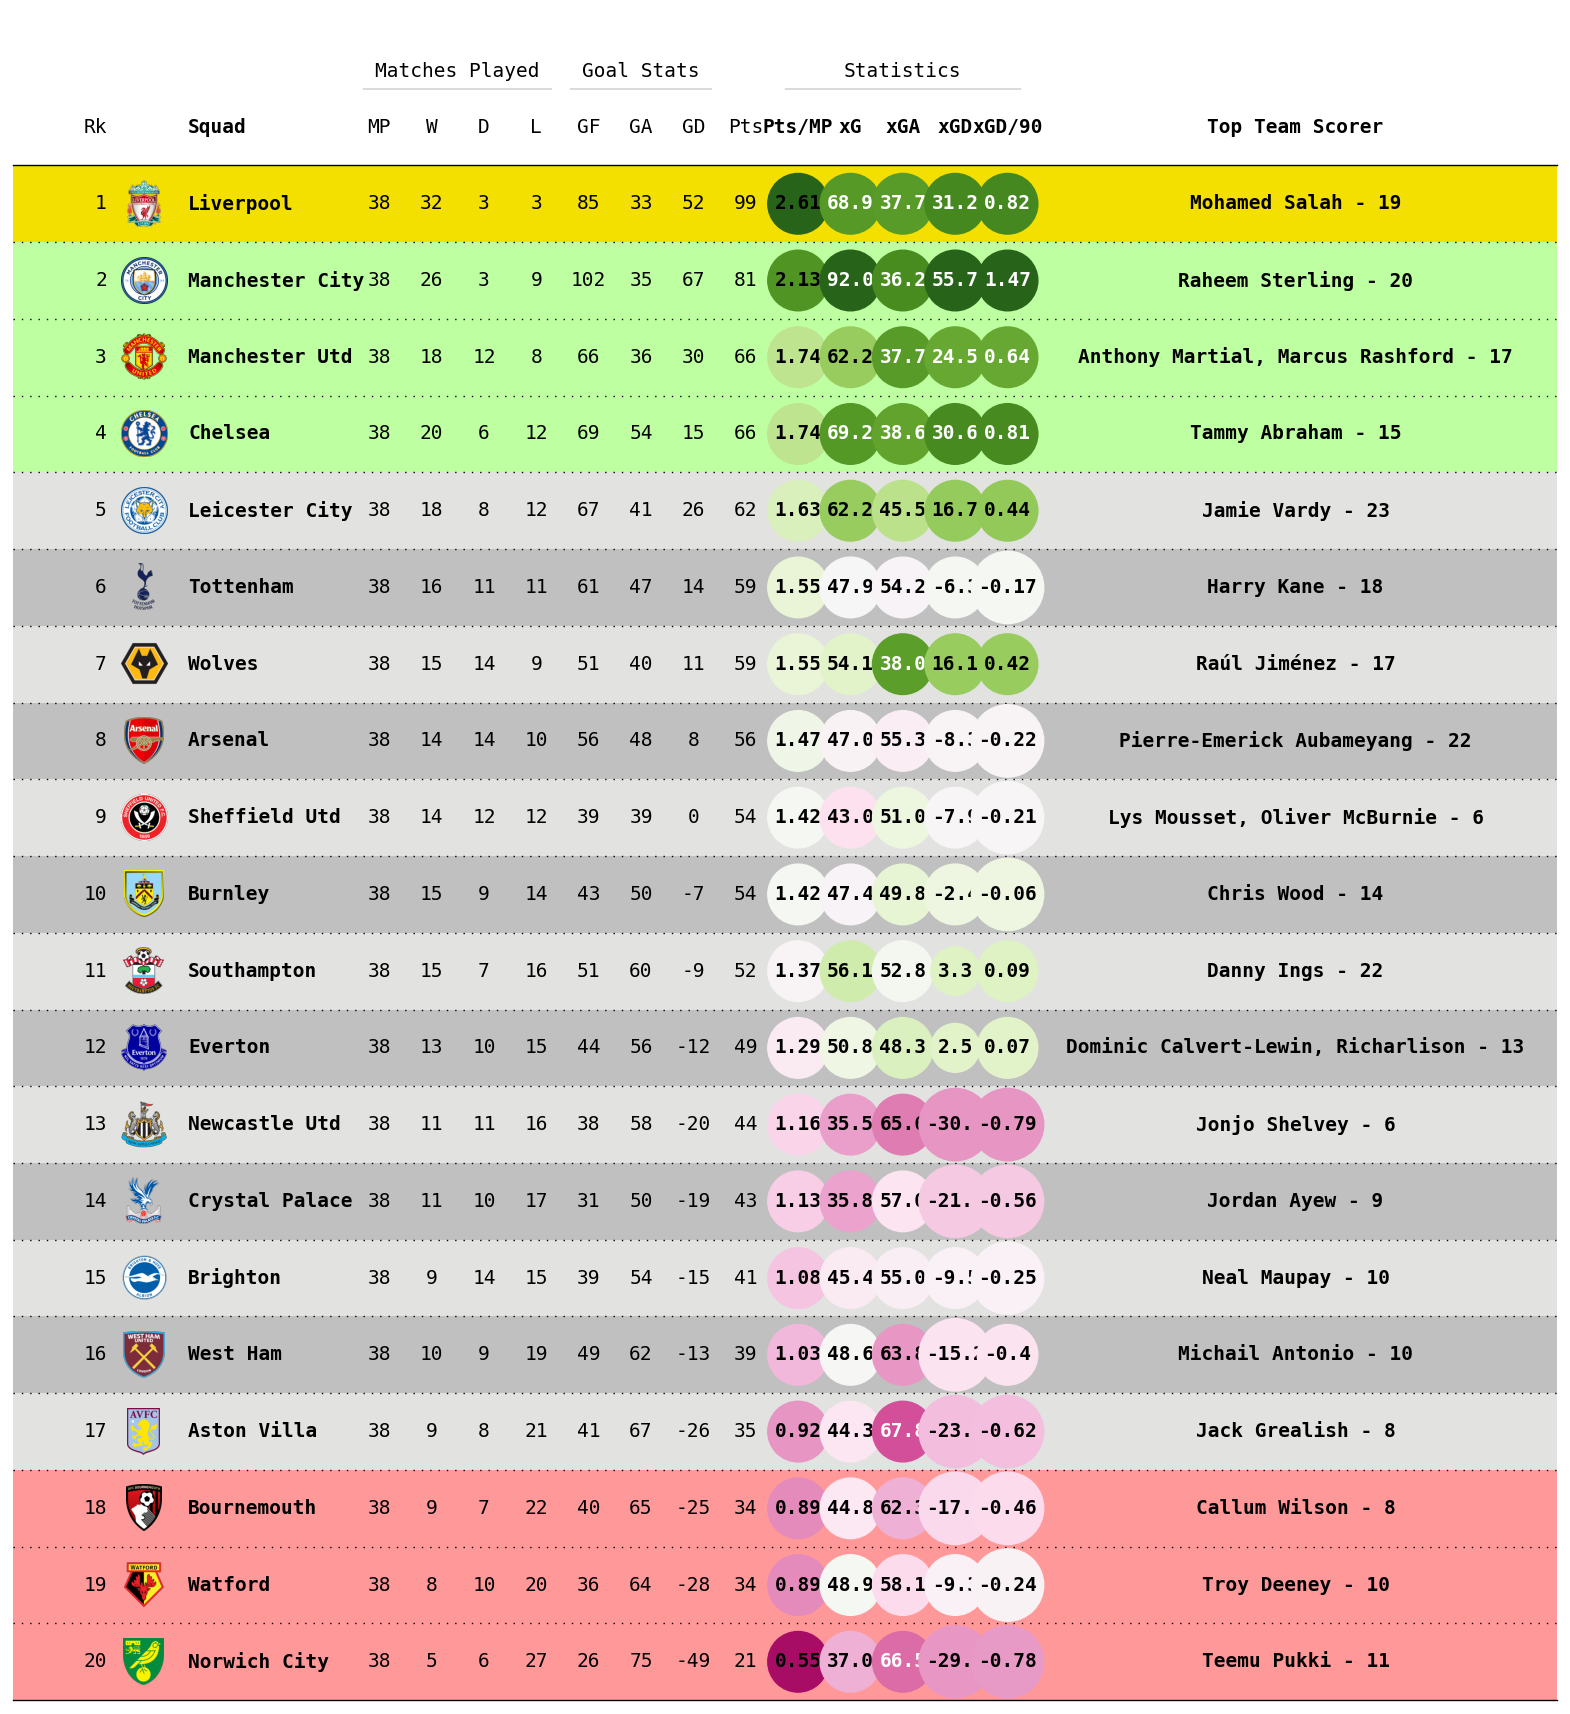

In [161]:
fig, ax = plt.subplots(figsize=(20, 22))
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

# Create and display the table
table = Table(
    df,
    column_definitions=col_defs,
    index_col="Rk",
    row_dividers=True,
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
    footer_divider=True,
    textprops={"fontsize": 14},
    ax=ax
).autoset_fontcolors(colnames=["xG", "xGA", "xGD", "xGD/90"])

table.rows[0].set_facecolor(row_colors["champ"])
for i in [1,2,3]:
    table.rows[i].set_facecolor(row_colors["top4"])
for i in range(4, 17):
    if i % 2 == 0:
        table.rows[i].set_facecolor(row_colors["even"])
        
for i in range(4, 17):
    if i % 2 > 0:
        table.rows[i].set_facecolor(row_colors["odd"])
for i in [17,18,19]:
    table.rows[i].set_facecolor(row_colors["relegation"])
    

plt.show()